<a href="https://colab.research.google.com/github/urkunina93/data-cleaning/blob/main/Data_Cleaning_Adult_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar librerias

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as sp
import seaborn as sns
import pandas as pd
import numpy as np
import random
from statistics import geometric_mean, harmonic_mean
from numpy import absolute, mean
from seaborn import displot
from plotnine import *

In [ ]:
import pandas as pd # se usa para cargar la base de Datos e interacuar con ella
import numpy as np # realizar operaciones matematicas en arreglos de datos
from matplotlib import pyplot as plt # graficar en 2D
import seaborn as sns

In [ ]:
#dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/house-votes-84.data.txt',delimiter = ",", nrows = None)

columnas = ['Edad','Clase de trabajo','Peso final','Educacion','# Educacion','Estado civil','Ocupacion','Relacion','Raza','Sexo','Ganancia','Gastos','Horas_semana', 'Ciudad_origen', 'Etiqueta'] # funcion para acceder a los nombres de todas las columnas en el Dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/adult.data',delimiter = ",", nrows = None, names=columnas)
dataset.dataframeName = 'adult_data.csv'
dataset.iloc[25:30, 0:] # imprime una muetra de el dataset

,Edad,Clase de trabajo,Peso final,Educacion,# Educacion,Estado civil,Ocupacion,Relacion,Raza,Sexo,Ganancia,Gastos,Horas_semana,Ciudad_origen,Etiqueta
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
26,19,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K
29,49,Private,193366,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


visualizar la informacion de las variables en el dataset utilizando la funcion 'info' y realizando una graifica para las variables categoricas


----------------------------# informacion-----------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Edad              32561 non-null  int64 
 1   Clase de trabajo  32561 non-null  object
 2   Peso final        32561 non-null  int64 
 3   Educacion         32561 non-null  object
 4   # Educacion       32561 non-null  int64 
 5   Estado civil      32561 non-null  object
 6   Ocupacion         32561 non-null  object
 7   Relacion          32561 non-null  object
 8   Raza              32561 non-null  object
 9   Sexo              32561 non-null  object
 10  Ganancia          32561 non-null  int64 
 11  Gastos            32561 non-null  int64 
 12  Horas_semana      32561 non-null  int64 
 13  Ciudad_origen     32561 non-null  object
 14  Etiqueta          32561 non-null  object
dtypes: int64(6), object(9)
me

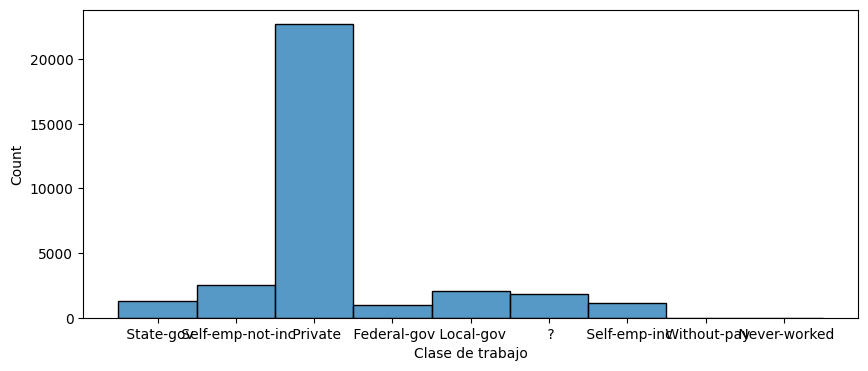

In [ ]:
print("\n----------------------------# informacion-----------------------------------\n")
dataset.info() # resumen de los datos
print("\n----------------------------Grafica-----------------------------------\n")
plt.figure(figsize=(10, 4))
sns.set_context(font_scale=0.7)
sns.histplot(data=dataset, x='Clase de trabajo',)
plt.show()



Al observar la grafica da la variable categorica 'clase de trabajo' encontramos un error tipografico ya que los valores faltantes estan marcados con un '?' y  no non un 'NaN' por lo cual se procede a remplazar este valor en todo e data set por la exprecion NA ara ahora si poder hacer la busqueda de valores (missing)

In [ ]:
dataset = dataset.replace(' ?', pd.NA)
dataset.iloc[25:30, 0:] #imprimir un rango específico de filas y columnas

print("\n----------------------------#_valores Nulos-----------------------------------\n")
print(dataset.isnull().sum())

print("\n----------------------------funcion dropna -----------------------------------")
print('\n # de datos antes de eliminar filas: ',dataset.shape[0])
dataset2=dataset.dropna(axis=0)# axis: 0=filas  1= columnas, elimina las filas donde se encuentra datos nulos
print('\n # de datos despues de eliminar filas: ',dataset2.shape[0])


----------------------------#_valores Nulos-----------------------------------

Edad                   0
Clase de trabajo    1836
Peso final             0
Educacion              0
# Educacion            0
Estado civil           0
Ocupacion           1843
Relacion               0
Raza                   0
Sexo                   0
Ganancia               0
Gastos                 0
Horas_semana           0
Ciudad_origen        583
Etiqueta               0
dtype: int64

----------------------------funcion dropna -----------------------------------

 # de datos antes de eliminar filas:  32561

 # de datos despues de eliminar filas:  30162


hacemos uso de la funcion 'describe' para observar las medidas de tendencia central y ayudarnos a detectear otros problemas

In [ ]:
dataset2.describe()

,Edad,Peso final,# Educacion,Ganancia,Gastos,Horas_semana
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
print(dataset2['Gastos'].value_counts().head(10))

df = dataset2.drop('Gastos', axis=1)

Gastos
0       28735
1902      194
1977      162
1887      155
1848       50
1485       45
2415       45
1740       41
1876       39
1590       37
Name: count, dtype: int64


Asi mismo ahora visualizamos los valores de cada columna  

Observando las medidas de tendencia central y los valores de cada columna encontramos que en la variable 'Gastos' la mayoria de los datos son ceros haciendo esto una posible columna irrelevante la cual rocedemos a borrar

In [ ]:

df.head()

,Edad,Clase de trabajo,Peso final,Educacion,# Educacion,Estado civil,Ocupacion,Relacion,Raza,Sexo,Ganancia,Horas_semana,Ciudad_origen,Etiqueta
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,40,Cuba,<=50K


In [ ]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {df.shape}')
df=df.drop_duplicates()
print(f'Tamaño del set después de eliminar las filas repetidas: {df.shape}')


Tamaño del set antes de eliminar las filas repetidas: (30162, 14)
Tamaño del set después de eliminar las filas repetidas: (30139, 14)


In [ ]:
correlation_matrix = df.corr()

# Crear el mapa de calor de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Mapa de calor de correlaciones')
plt.show()


ValueError: could not convert string to float: ' State-gov'

Estaistica inferencial

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = dataset2.corr()

# Crear el mapa de calor de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Mapa de calor de correlaciones')
plt.show()

ValueError: could not convert string to float: ' State-gov'

Analizamos ahora estas 3 columnas con la funcion 'describe'

In [ ]:
print("\n----------------------------Clase de trabajo -----------------------------------\n")
print(df['Clase de trabajo'].describe())
print("\n----------------------------Educacion -----------------------------------\n")
print(df['Ocupacion'].describe())
print("\n----------------------------Ciudad_origen -----------------------------------\n")
print(df['Ciudad_origen'].describe())


----------------------------Clase de trabajo -----------------------------------

count        30725
unique           8
top        Private
freq         22696
Name: Clase de trabajo, dtype: object

----------------------------Educacion -----------------------------------

count               30718
unique                 14
top        Prof-specialty
freq                 4140
Name: Ocupacion, dtype: object

----------------------------Ciudad_origen -----------------------------------

count              31978
unique                41
top        United-States
freq               29170
Name: Ciudad_origen, dtype: object


con la funcion 'dropna' nos desasemos de las filas donde se encuentran valores nulos

despues de eliminar estas filas y una columna hemos quedado con un datafrme de 30162 filas por 14 columnas pero ya sin valores nulos como podemos observar a continuacion

por ultimo se procede a buscar y eliminar columnas repetidas para quedarnos ahora con un dataframe limpio que llamaremos df_depurado